In [1]:
import pandas as pd 

df = pd.read_csv("C:/Users/theethat.a/Downloads/spam.csv",encoding = 'latin-1')


In [2]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [4]:
df.rename(columns={"v1":"target","v2":"text"}, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   target      5572 non-null   object
 1   text        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(labels = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1, inplace =True)

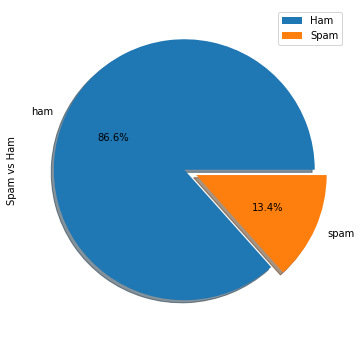

In [7]:
import matplotlib.pyplot as plt
df["target"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [8]:
length=[]
for i in df.text:
    length.append(len(i))

In [9]:
df['length']= length

In [10]:
df['text'][df['length']==910]

1084    For me the love should start with attraction.i...
Name: text, dtype: object

In [11]:
import numpy as np
topMessages = df.groupby("text")["target"].agg([len, np.max]).sort_values(by = "len", ascending = False).head(n = 10)
display(topMessages)

,len,amax
text,,
"Sorry, I'll call later",30,ham
I cant pick the phone right now. Pls send a message,12,ham
Ok...,10,ham
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..,4,ham
"Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.",4,ham
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!,4,spam
Okie,4,ham
"Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...",4,ham
"7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\""... good morning dear""",4,ham


array([[<AxesSubplot:title={'center':'length'}>]], dtype=object)

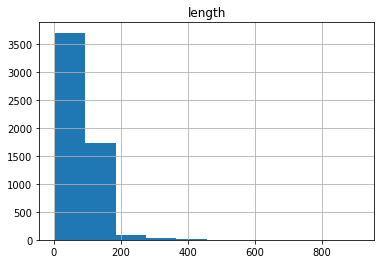

In [12]:
df.hist("length")

In [13]:
from nltk.tokenize import word_tokenize
text=df['text']
print("This is the Summary:\n\n",text[0])
print("\nThis is the Tokenize Summary:\n\n",word_tokenize(text[0]))

This is the Summary:

 Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

This is the Tokenize Summary:

 ['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']


In [14]:
x = 0
for j in range(len(text)):
    x=x+len(str(text[j]))
print("Total characters in x: ",x)
print("Avg characters in x:",x/len(text))

Total characters in x:  446422
Avg characters in x: 80.11880832735105


In [15]:
from nltk.corpus import stopwords
spam_messages = df[df["target"] == "spam"]["text"]
ham_messages = df[df["target"] == "ham"]["text"]

spam_words = []
ham_words = []

def extractSpamWords(spamMessages):
    global spam_words
    words = [word.lower() for word in word_tokenize(spamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    spam_words = spam_words + words
    
def extractHamWords(hamMessages):
    global ham_words
    words = [word.lower() for word in word_tokenize(hamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    ham_words = ham_words + words

spam_messages.apply(extractSpamWords)
ham_messages.apply(extractHamWords)

0       None
1       None
3       None
4       None
6       None
        ... 
5565    None
5568    None
5569    None
5570    None
5571    None
Name: text, Length: 4825, dtype: object

In [16]:
#!python -m pip install spacy
import string 
import spacy

In [17]:
#!python -m pip install wordcloud
from wordcloud import WordCloud

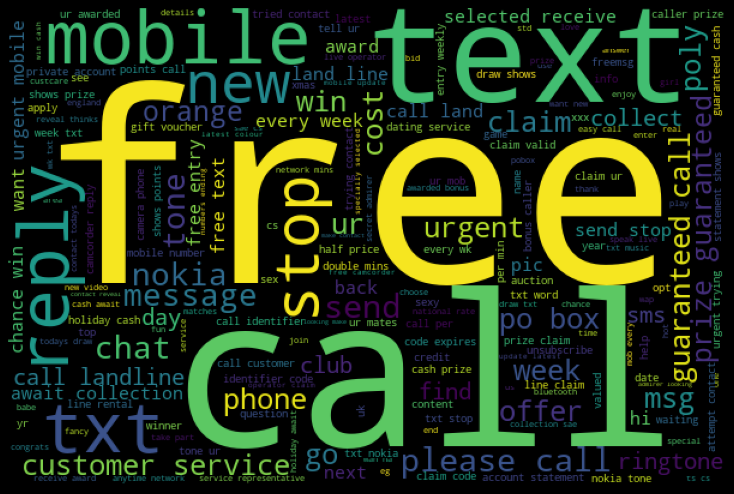

In [18]:
#Spam Word cloud

spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

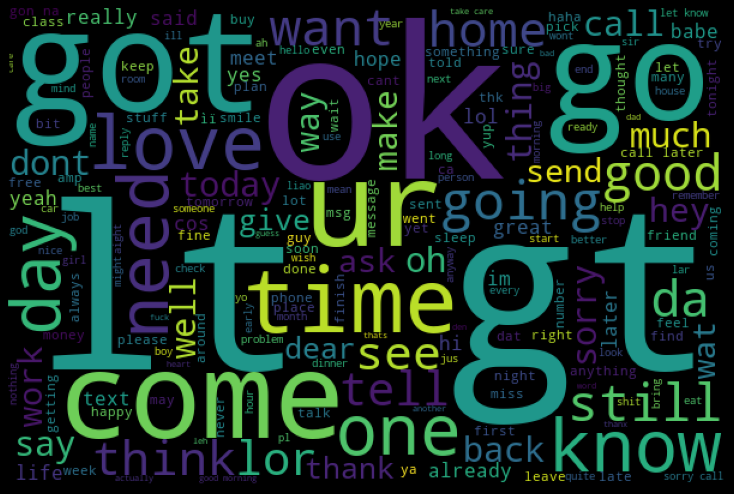

In [19]:
#Ham Word cloud

ham_wordcloud = WordCloud(width=600, height=400).generate(" ".join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [20]:
# Top 10 spam words

spam_words = np.array(spam_words)
print("Top 10 Spam words are :\n")
pd.Series(spam_words).value_counts().head(n = 20)

Top 10 Spam words are :



call       346
free       219
txt        156
ur         144
u          144
mobile     123
text       121
stop       114
claim      113
reply      104
prize       92
get         84
new         69
send        68
nokia       65
urgent      62
cash        62
win         60
contact     56
service     55
dtype: int64

In [21]:
# Top 10 ham words

ham_words = np.array(ham_words)
print("Top 10 Ham words are :\n")
pd.Series(ham_words).value_counts().head(n=20)


Top 10 Ham words are :



u        989
gt       318
lt       316
get      301
ok       256
go       248
got      242
ur       237
know     236
like     231
call     230
good     229
come     227
time     197
love     191
day      185
going    169
one      167
want     163
lor      162
dtype: int64

In [22]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [23]:
df["messageLength"] = df["text"].apply(len)
df["messageLength"].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: messageLength, dtype: float64

C:\Users\Theethat.a\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Theethat.a\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


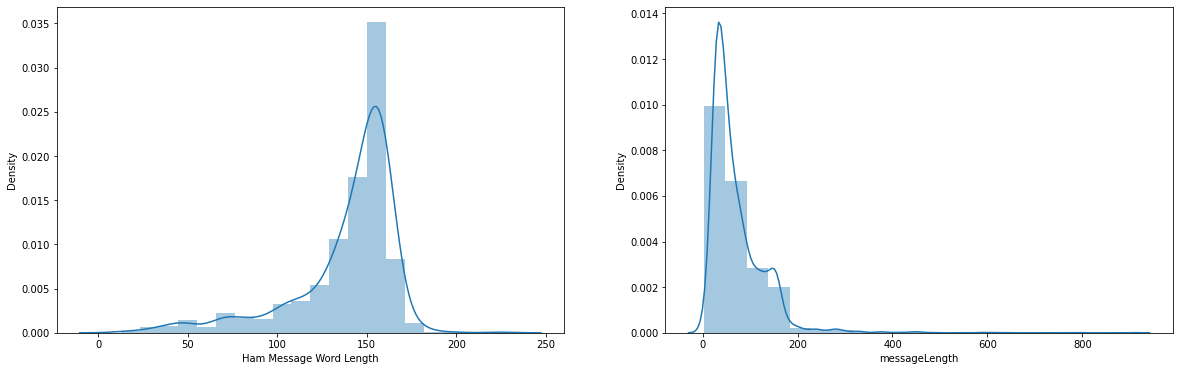

In [24]:
#!python -m pip install seaborn
import seaborn as sns
f, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.distplot(df[df["target"] == "spam"]["messageLength"], bins = 20, ax = ax[0])
ax[0].set_xlabel("Spam Message Word Length")

sns.distplot(df[df["target"] == "ham"]["messageLength"], bins = 20, ax = ax[1])
ax[0].set_xlabel("Ham Message Word Length")

plt.show()

In [43]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

def cleanText(message):
    
    message = message.translate(str.maketrans('', '', string.punctuation))
    words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words("english")]
    
    return " ".join(words)

df["text"] = df["text"].apply(cleanText)
df.head(n = 10)    

,target,text,length,messageLength
0,0,go jurong point crazi avail bugi n great world...,111,111
1,0,ok lar joke wif u oni,29,29
2,0,free entri 2 wkli comp win fa cup final tkts 2...,155,155
3,0,u dun say ear hor u c alreadi say,49,49
4,0,nah dont think goe usf live around though,61,61
5,0,freemsg hey darl 3 week word back id like fun ...,148,148
6,0,even brother like speak treat like aid patent,77,77
7,0,per request mell mell oru minnaminungint nurun...,160,160
8,0,winner valu network custom select receivea å£9...,158,158
9,0,mobil 11 month u r entitl updat latest colour ...,154,154


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
features = vec.fit_transform(df["text"])
print(features.shape)

(5572, 7880)


In [45]:
def encodeCategory(cat):
    if cat == "spam":
        return 1
    else:
        return 0
        
df["target"] = df["target"].apply(encodeCategory)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, df["target"], stratify = df["target"], test_size = 0.2)

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score

from sklearn.naive_bayes import MultinomialNB
multinomialNb = MultinomialNB()
multinomialNb.fit(X_train, y_train)

y_pred = multinomialNb.predict(X_test)

for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    print("Beta is",i,fbeta_score(y_test, y_pred, beta = i))

    
print(cross_val_score(multinomialNb,X_train,y_train))
print(cross_val_score(multinomialNb,X_train,y_train).mean())

print(cross_val_score(gaussianNb,X_train,y_train))
print(cross_val_score(gaussianNb,X_train,y_train).mean())

Beta is 0.1 0.0
Beta is 0.2 0.0
Beta is 0.3 0.0
Beta is 0.4 0.0
Beta is 0.5 0.0
Beta is 0.6 0.0
Beta is 0.7 0.0
Beta is 0.8 0.0
Beta is 0.9 0.0
[1. 1. 1. 1. 1.]
1.0
[nan nan nan nan nan]
nan


C:\Users\Theethat.a\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\Users\Theethat.a\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Theethat.a\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Theethat.a\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\naive_bayes.py", line 210, in fit
    X, y = self._validate_data(X, y)
  Fil

In [30]:
from sklearn import model_selection
scores = []
y=df['target']
cv = model_selection.KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(features):
    X_train, X_test, y_train, y_test = features[train_index], features[test_index], y[train_index], y[test_index]
    gaussianNb.fit(X_train, y_train)
    scores.append(gaussianNb.score(X_test, y_test))

C:\Users\Theethat.a\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [31]:
m=0
for i in scores:
    print(i)
    m=m+i
m/len(scores)

0.967741935483871
0.967741935483871
0.9533213644524237
0.9802513464991023
0.9569120287253142
0.9712746858168761
0.9605026929982047
0.9658886894075404
0.9676840215439856
0.9784560143626571


0.9669774714773846

In [33]:
print(df['target'].value_counts())
print(df['target'].value_counts()[1]/df.shape[0])

0    4825
1     747
Name: target, dtype: int64
0.13406317300789664


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

In [ ]:
false=[]
y_test_new =[]
for i in y_test:
    y_test_new.append(i)
for i in range(0,557):
    if y_test_new[i] != y_pred[i]:
        false.append(False)
    else:
        false.append(True)

In [3]:
import tensorflow as tf
!python -m pip install tensorflow_datasets
import tensorflow_datasets as tfds

  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491062 sha256=946a8fc52526d0a4307633bef41428e45d6a503b888de40dcf03f4518410f893
  Stored in directory: c:\users\theethat.a\appdata\local\pip\cache\wheels\56\b0\fe\4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21500 sha256=183148c870ac60bcd433056198dd0a0f108f956a6ab723265f7e0b5a4856f2d9
  Stored in directory: c:\users\theethat.a\appdata\local\pip\cache\wheels\29\93\c6\762e359f8cb6a5b69c72235d798804cae523bbe41c2aa8333d
  Created wheel for dill: filename=dill-0.3.2-py3-none-any.whl size=78976 sha256=d34896ec74fc4809e65f5385d9767347014f25eb0873aef54e0519e3ca7cc618
  Stored in directory: c:\users\theethat.a\appdata\local\pip\cache\wheels\72\6b\d5\5548aa1b73b8c3d176ea13f9f92066b02e82141549d90e2100
Successfully built future promise dill


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\Theethat.a\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


ImportError: This version of TensorFlow Datasets requires TensorFlow version >= 2.1.0; Detected an installation of version 2.0.0. Please upgrade TensorFlow to proceed.

In [4]:
datasets, info =tfds.load("imdb_reviews", as_supervised=True, with_info=True)
train_size = info.splits['train'].num_examples

NameError: name 'tfds' is not defined